In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import torch 
from torch import nn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

In [2]:
df = pd.read_csv('commodity_futures.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
5864,2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
5865,2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25
5866,2022-09-22,7.089,1671.4,83.49,90.46,1457.00,688.25,3.4985,19.548,1006.25,...,3123.75,341.15,24502.0,910.75,18.49,251.57,223.55,94.125,979.50,96.83


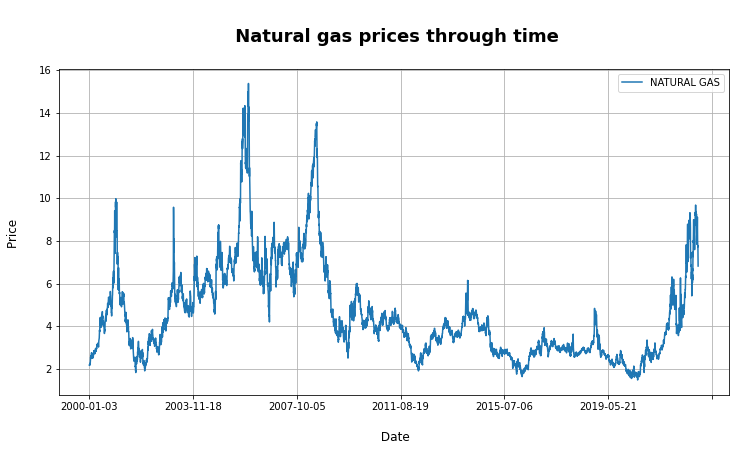

In [3]:
df.plot(x='Date', y='NATURAL GAS', kind='line', figsize=(12,6), grid=True)
plt.title('\n Natural gas prices through time\n', fontsize =18, fontweight='bold')
plt.xlabel('\n Date', fontsize=12)
plt.ylabel('Price \n', fontsize= 12)
plt.show()

In [4]:
df.set_index('Date', inplace=True)
df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,145.725,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,146.300,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,145.875,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25


In [5]:
data = df[['NATURAL GAS']]
data.isna().sum()

NATURAL GAS    1
dtype: int64

In [6]:
data = data.dropna()

In [7]:
print('THE DATAFRAME: \n\n', data)
print('\n\nABOUT THE DATAFRAME: \n\n', data.describe())

THE DATAFRAME: 

             NATURAL GAS
Date                   
2000-01-04        2.176
2000-01-05        2.168
2000-01-06        2.196
2000-01-07        2.173
2000-01-10        2.216
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[5867 rows x 1 columns]


ABOUT THE DATAFRAME: 

        NATURAL GAS
count  5867.000000
mean      4.544450
std       2.243106
min       1.482000
25%       2.870000
50%       3.925000
75%       5.676000
max      15.378000


In [8]:
data = data.iloc[5137:]
data

,NATURAL GAS
Date,
2019-11-29,2.281
2019-12-02,2.329
2019-12-03,2.441
2019-12-04,2.399
2019-12-05,2.427
...,...
2022-09-19,7.752
2022-09-20,7.717
2022-09-21,7.779


In [9]:
print('THE DATAFRAME: \n\n', data)
print('\n\nABOUT THE DATAFRAME: \n\n', data.describe())

THE DATAFRAME: 

             NATURAL GAS
Date                   
2019-11-29        2.281
2019-12-02        2.329
2019-12-03        2.441
2019-12-04        2.399
2019-12-05        2.427
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[730 rows x 1 columns]


ABOUT THE DATAFRAME: 

        NATURAL GAS
count   730.000000
mean      3.880682
std       2.113355
min       1.482000
25%       2.298250
50%       2.974500
75%       4.983500
max       9.680000


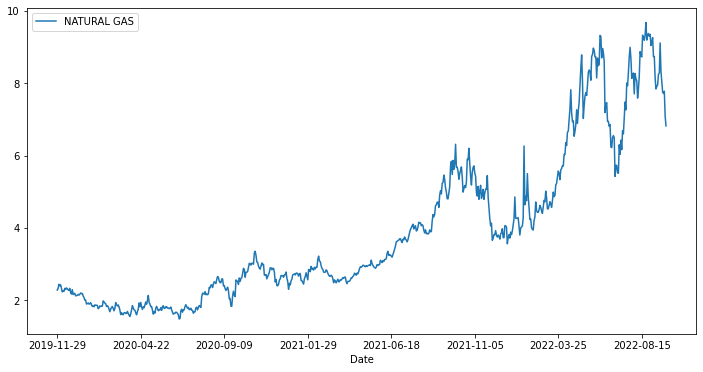

In [10]:
data[:5137].plot(figsize=(12,6)) 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2019-11-29 to 2022-09-23
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NATURAL GAS  730 non-null    float64
dtypes: float64(1)
memory usage: 11.4+ KB


In [12]:
def split_data (data, window):
  rawdata = data.to_numpy()
  data = []

  for i in range (len(rawdata) - window):
    data.append(rawdata[i: i+window])

  data = np.array(data)

  testsize = 5
  trainsize = data.shape[0] - testsize

  x_train = data[:trainsize,:-1,:]
  y_train = data[:trainsize,-1,:]
    
  x_test = data[trainsize:,:-1]
  y_test = data[trainsize:,-1,:]

  return [x_train, y_train, x_test, y_test]

In [13]:
window = 5 #sequence length
x_train, y_train, x_test, y_test = split_data(data, window)

In [14]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (720, 4, 1)
y_train.shape =  (720, 1)
x_test.shape =  (5, 4, 1)
y_test.shape =  (5, 1)


In [15]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)

In [16]:
print(x_train.size())
print(x_test.size())

torch.Size([720, 4, 1])
torch.Size([5, 4, 1])


In [17]:
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [18]:
print(y_train.size())
print(y_test.size())

torch.Size([720, 1])
torch.Size([5, 1])


In [19]:
class LSTM(nn.Module):
    def __init__(self, input_dimentions, hidden_dimentions, layers, output_dimentions):
        super(LSTM, self).__init__()
        self.hidden_dimentions = hidden_dimentions
        self.layers = layers
        
        self.lstm = nn.LSTM(input_dimentions, hidden_dimentions, layers, batch_first=True)
        self.dropout = nn.Dropout(p=0.1, inplace=False)
        self.fc = nn.Linear(hidden_dimentions, output_dimentions) # readout layer

    def forward(self, x):
        h0 = torch.zeros(self.layers, x.size(0), self.hidden_dimentions).requires_grad_() # initialize hidden state with zeros
        c0 = torch.zeros(self.layers, x.size(0), self.hidden_dimentions).requires_grad_()
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach())) # detach the hidden state to prevent vanishing gradients
                                                                 # a part of truncated backpropagation through time (BPTT)

        out = self.fc(out[:, -1, :])  #we want to decode only the last time step hidden states

        return out

In [20]:
input_dimentions = 1
hidden_dimentions = 256
layers = 4
output_dimentions = 1
epochs = 100

In [21]:
network = LSTM(input_dimentions, hidden_dimentions, output_dimentions, layers)

criterion = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [22]:
hist = np.zeros(epochs)
lstm = []

for t in range(epochs):

    y_train_pred = network(x_train)
    loss = criterion(y_train_pred, y_train)

    hist[t] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    print("Epoch -", t, " ------ Mean Squared Error Loss: ", loss.item())
    print("-"*70)
   

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([720, 1])) that is different to the input size (torch.Size([720, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch - 0  ------ Mean Squared Error Loss:  19.312591552734375
----------------------------------------------------------------------
Epoch - 1  ------ Mean Squared Error Loss:  18.80449676513672
----------------------------------------------------------------------
Epoch - 2  ------ Mean Squared Error Loss:  18.3005313873291
----------------------------------------------------------------------
Epoch - 3  ------ Mean Squared Error Loss:  17.787221908569336
----------------------------------------------------------------------
Epoch - 4  ------ Mean Squared Error Loss:  17.250551223754883
----------------------------------------------------------------------
Epoch - 5  ------ Mean Squared Error Loss:  16.676206588745117
----------------------------------------------------------------------
Epoch - 6  ------ Mean Squared Error Loss:  16.04959487915039
----------------------------------------------------------------------
Epoch - 7  ------ Mean Squared Error Loss:  15.35582447052002
----

In [23]:
predictedtrain = pd.DataFrame(y_train_pred.detach().numpy())
originaltrain = pd.DataFrame(y_train.detach().numpy())

In [24]:
predictedtrain

,0,1,2,3
0,2.226188,2.213858,2.230867,2.230173
1,2.276429,2.264232,2.282649,2.281655
2,2.294862,2.282992,2.303925,2.302016
3,2.250802,2.239382,2.261313,2.258785
4,2.201648,2.190221,2.211988,2.208167
...,...,...,...,...
715,7.856869,7.860492,7.808652,7.831932
716,7.714058,7.716258,7.667625,7.689093
717,7.690215,7.690730,7.641948,7.662931
718,7.740386,7.739952,7.690446,7.711544


In [25]:
originaltrain

,0
0,2.427
1,2.334
2,2.232
3,2.264
4,2.243
...,...
715,7.957
716,8.249
717,8.284
718,9.114


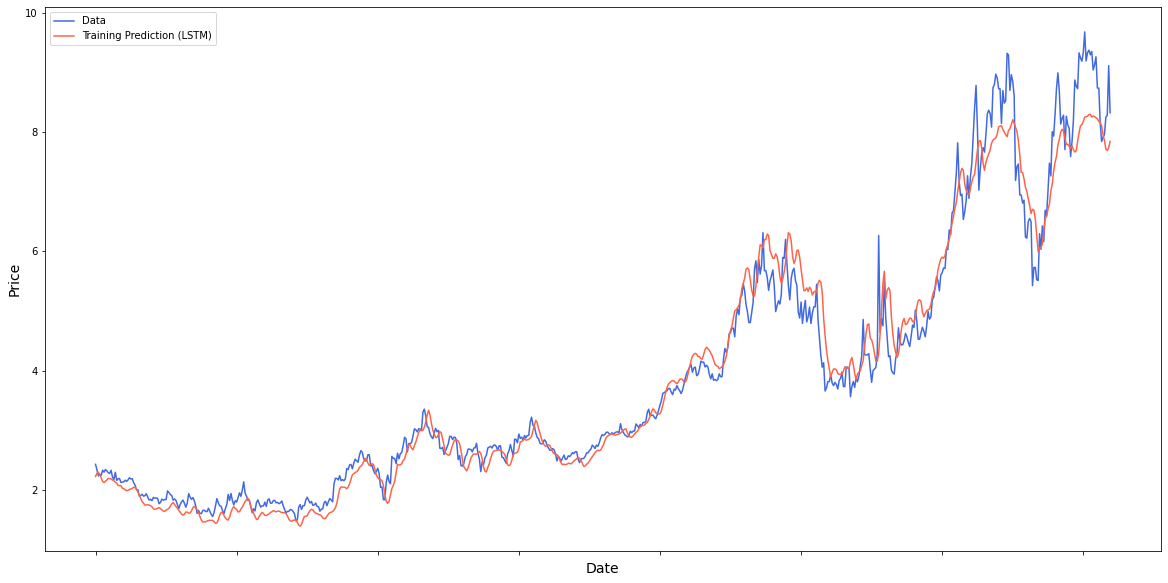

In [26]:
fig = plt.figure()
ax = sns.lineplot(x = originaltrain.index, y = originaltrain[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predictedtrain.index, y = predictedtrain[0], label="Training Prediction (LSTM)", color='tomato')

ax.set_xlabel("Date", size = 14)
ax.set_ylabel("Price", size = 14)
ax.set_xticklabels('', size=10)

fig.set_figheight(10)
fig.set_figwidth(20)


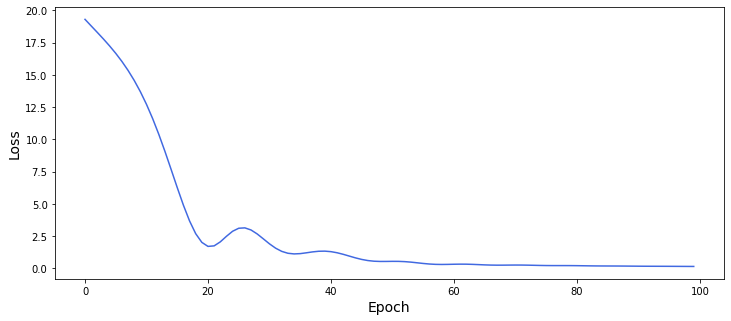

In [27]:
fig1 = plt.figure()
ax1 = sns.lineplot(data=hist, color='royalblue')
ax1.set_xlabel("Epoch", size = 14)
ax1.set_ylabel("Loss", size = 14)

fig1.set_figheight(5)
fig1.set_figwidth(12)


In [28]:
y_test_pred = network(x_test)

predictedtest = pd.DataFrame(y_test_pred.detach().numpy())
originaltest = pd.DataFrame(y_test.detach().numpy())

In [29]:
predictedtest


,0,1,2,3
0,7.941728,7.936422,7.888104,7.909479
1,7.979324,7.976139,7.925488,7.950950
2,7.968146,7.969656,7.919902,7.943964
3,7.764053,7.765265,7.719801,7.741896
4,7.664306,7.665063,7.621744,7.642281


In [30]:
originaltest 

,0
0,8.029
1,7.752
2,7.717
3,7.779
4,7.089


In [31]:
RMSE_TEST= []
for i in range(layers):
  rmsetrain = math.sqrt(mean_squared_error(originaltrain, predictedtrain[i]))
  print('RMSE TRAIN layer %d :' % i + ' ----  %f' % rmsetrain )
  rmsetest = math.sqrt(mean_squared_error(originaltest, predictedtest[i]))
  print('RMSE TEST  layer %d :' % i + ' ----  %f' % rmsetest + '\n')
  RMSE_TEST.append(rmsetest)

print('The smallest test RMSE is:', min(RMSE_TEST))


RMSE TRAIN layer 0 : ----  0.388607
RMSE TEST  layer 0 : ----  0.301187

RMSE TRAIN layer 1 : ----  0.390606
RMSE TEST  layer 1 : ----  0.301556

RMSE TRAIN layer 2 : ----  0.397468
RMSE TEST  layer 2 : ----  0.275114

RMSE TRAIN layer 3 : ----  0.396723
RMSE TEST  layer 3 : ----  0.287359

The smallest test RMSE is: 0.2751142183355118


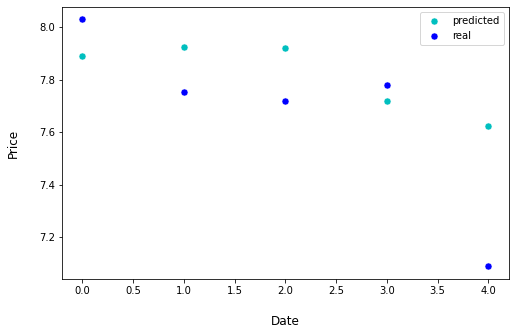

In [32]:
fig = plt.figure()
ax = sns.scatterplot(x = predictedtest.index, y = predictedtest[2], label="predicted", color='c', s=50)
ax = sns.scatterplot(x = originaltest.index, y = originaltest[0], label="real", color='b', s=50)

ax.set_xlabel("\nDate", size = 12)
ax.set_ylabel("Price\n", size = 12)

fig.set_figheight(5)
fig.set_figwidth(8)
